In [3]:
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
df=pd.read_csv('data/RFM RANKING - Sheet1 (2) (1).csv')
#df.shape
df.head()

,1,234.816,Unnamed: 2,CustomerID,Max of INVOICE DATE,Count of InvoiceNo,Sum of Total sales,days since,days_sincetoday,RSCORE,...,M SCORE,RFM SCORE,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,2.0,465.602,NaN,12346,40561.0,1,77183.60,325,4853,1,...,4,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.0,909.668,NaN,12347,40884.0,182,4310.00,2,4530,4,...,4,414,NaN,NaN,NaN,NaN,NOTE:,NaN,NaN,NaN
2,4.0,2003.56,NaN,12348,40811.0,31,1797.24,75,4603,2,...,4,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,279489.02,NaN,12349,40868.0,73,1757.55,18,4546,3,...,4,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,RECENCY,NaN,12350,40576.0,17,334.40,310,4838,1,...,2,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_relevant=pd.read_csv('df_relevant.csv')
df_relevant.head()
#df_relevant.shape

,CustomerID,RSCORE,F SCORE,M SCORE,RFM SCORE
0,12346,1,4,4,144
1,12347,4,1,4,414
2,12348,2,3,4,234
3,12349,3,2,4,324
4,12350,1,3,2,132


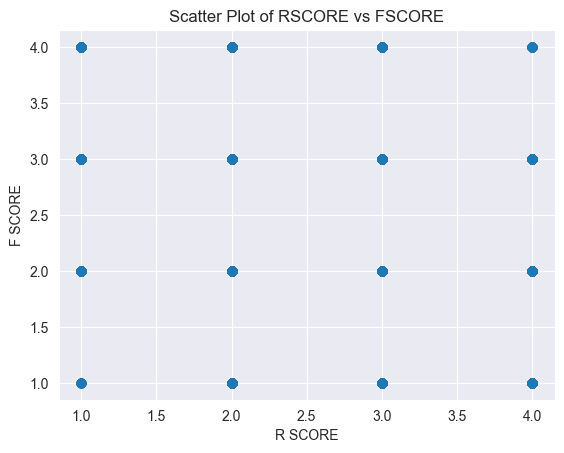

In [6]:
plt.scatter(df_relevant['RSCORE'], df_relevant['F SCORE'])
plt.xlabel('R SCORE')
plt.ylabel('F SCORE')
plt.title('Scatter Plot of RSCORE vs FSCORE')
plt.show()

0       1.386294
1       0.000000
2       1.098612
3       0.693147
4       1.098612
          ...   
4367    1.386294
4368    1.386294
4369    1.386294
4370    0.000000
4371    0.693147
Name: F SCORE, Length: 4372, dtype: float64 0       1.386294
1       0.000000
2       1.098612
3       0.693147
4       1.098612
          ...   
4367    1.386294
4368    1.386294
4369    1.386294
4370    0.000000
4371    0.693147
Name: F SCORE, Length: 4372, dtype: float64


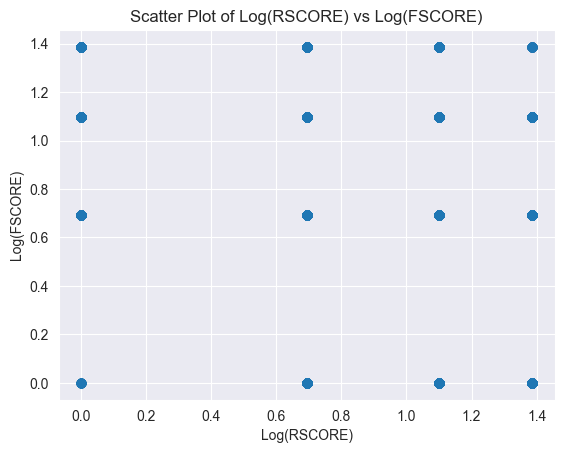

In [7]:
import numpy as np
# Apply logarithmic transformation
log_rscore = np.log(df_relevant['RSCORE'])
log_fscore = np.log(df_relevant['F SCORE'])
print(log_fscore,log_fscore)

# Create scatter plot
plt.scatter(log_rscore, log_fscore)
plt.xlabel('Log(RSCORE)')
plt.ylabel('Log(FSCORE)')
plt.title('Scatter Plot of Log(RSCORE) vs Log(FSCORE)')
plt.show()

Index(['CustomerID', 'RSCORE', 'F SCORE', 'M SCORE', 'RFM SCORE'], dtype='object')


/var/folders/kb/gcm8sg511nv0stb__mrkgz8m0000gn/T/ipykernel_2169/1019206946.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


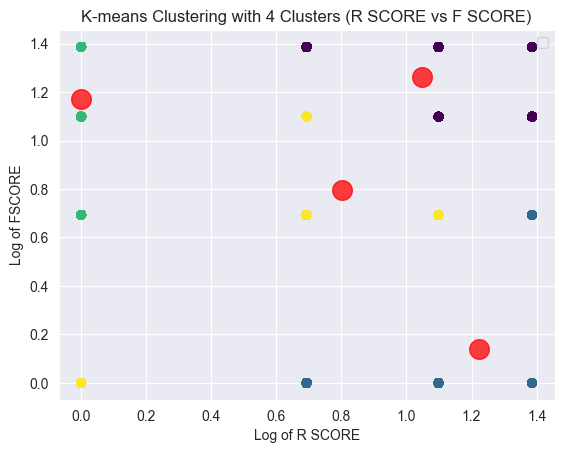

/var/folders/kb/gcm8sg511nv0stb__mrkgz8m0000gn/T/ipykernel_2169/1019206946.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


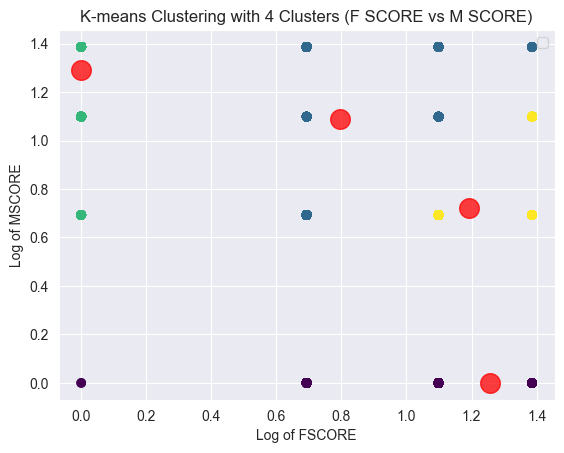

/var/folders/kb/gcm8sg511nv0stb__mrkgz8m0000gn/T/ipykernel_2169/1019206946.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


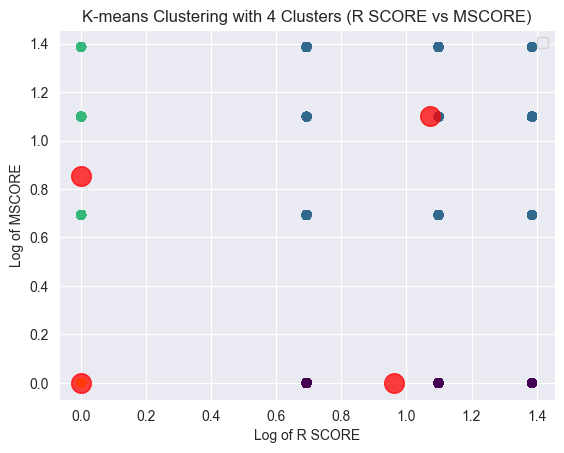

      CustomerID  RSCORE  F SCORE  M SCORE  RFM SCORE  Cluster_RF  Cluster_FM  \
0          12346       1        4        4        144           2           1   
1          12347       4        1        4        414           1           2   
2          12348       2        3        4        234           3           1   
3          12349       3        2        4        324           3           1   
4          12350       1        3        2        132           2           3   
...          ...     ...      ...      ...        ...         ...         ...   
4367       18280       1        4        1        141           2           0   
4368       18281       1        4        1        141           2           0   
4369       18282       4        4        1        441           0           0   
4370       18283       4        1        4        414           1           2   
4371       18287       3        2        4        324           3           1   

      Cluster_RM  
0       

In [8]:
# Check the columns of the DataFrame
print(df_relevant.columns)

# Strip any leading/trailing whitespace from the column names
df_relevant.columns = df_relevant.columns.str.strip()

# Apply logarithmic transformation
if 'RSCORE' in df_relevant.columns and 'F SCORE' in df_relevant.columns and 'M SCORE' in df_relevant.columns:
    log_rscore = np.log(df_relevant['RSCORE'])
    log_fscore = np.log(df_relevant['F SCORE'])
    log_mscore = np.log(df_relevant['M SCORE'])
else:
    raise KeyError("The required columns 'RSCORE', 'F SCORE', and/or 'M SCORE' are not present in the DataFrame.")

# Combining the transformed scores into new DataFrames for clustering
data_rf = pd.DataFrame({'log_rscore': log_rscore, 'log_fscore': log_fscore})
data_fm = pd.DataFrame({'log_fscore': log_fscore, 'log_mscore': log_mscore})
data_rm = pd.DataFrame({'log_rscore': log_rscore, 'log_mscore': log_mscore})

# Perform K-means clustering for R SCORE vs F SCORE
kmeans_rf = KMeans(n_clusters=4, random_state=42)
data_rf['Cluster'] = kmeans_rf.fit_predict(data_rf)
centroids_rf = kmeans_rf.cluster_centers_

# Perform K-means clustering for F SCORE vs M SCORE
kmeans_fm = KMeans(n_clusters=4, random_state=42)
data_fm['Cluster'] = kmeans_fm.fit_predict(data_fm)
centroids_fm = kmeans_fm.cluster_centers_

# Perform K-means clustering for R SCORE vs M SCORE
kmeans_rm = KMeans(n_clusters=4, random_state=42)
data_rm['Cluster'] = kmeans_rm.fit_predict(data_rm)
centroids_rm = kmeans_rm.cluster_centers_

# Add the cluster assignments back to the original DataFrame
df_relevant['Cluster_RF'] = data_rf['Cluster']
df_relevant['Cluster_FM'] = data_fm['Cluster']
df_relevant['Cluster_RM'] = data_rm['Cluster']

# Optional: Visualize the clusters
# R SCORE vs F SCORE
plt.scatter(data_rf['log_rscore'], data_rf['log_fscore'], c=data_rf['Cluster'], cmap='viridis')
plt.scatter(centroids_rf[:, 0], centroids_rf[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Log of R SCORE')
plt.ylabel('Log of FSCORE')
plt.title('K-means Clustering with 4 Clusters (R SCORE vs F SCORE)')
plt.legend()
plt.show()

# FSCORE vs MSCORE
plt.scatter(data_fm['log_fscore'], data_fm['log_mscore'], c=data_fm['Cluster'], cmap='viridis')
plt.scatter(centroids_fm[:, 0], centroids_fm[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Log of FSCORE')
plt.ylabel('Log of MSCORE')
plt.title('K-means Clustering with 4 Clusters (F SCORE vs M SCORE)')
plt.legend()
plt.show()

# R SCORE vs MSCORE
plt.scatter(data_rm['log_rscore'], data_rm['log_mscore'], c=data_rm['Cluster'], cmap='viridis')
plt.scatter(centroids_rm[:, 0], centroids_rm[:, 1], c='red', s=200, alpha=0.75)
plt.xlabel('Log of R SCORE')
plt.ylabel('Log of MSCORE')
plt.title('K-means Clustering with 4 Clusters (R SCORE vs MSCORE)')
plt.legend()
plt.show()

# Print the resulting DataFrame with cluster assignments
print(df_relevant)


Silhouette Score: 0.39967526633951883


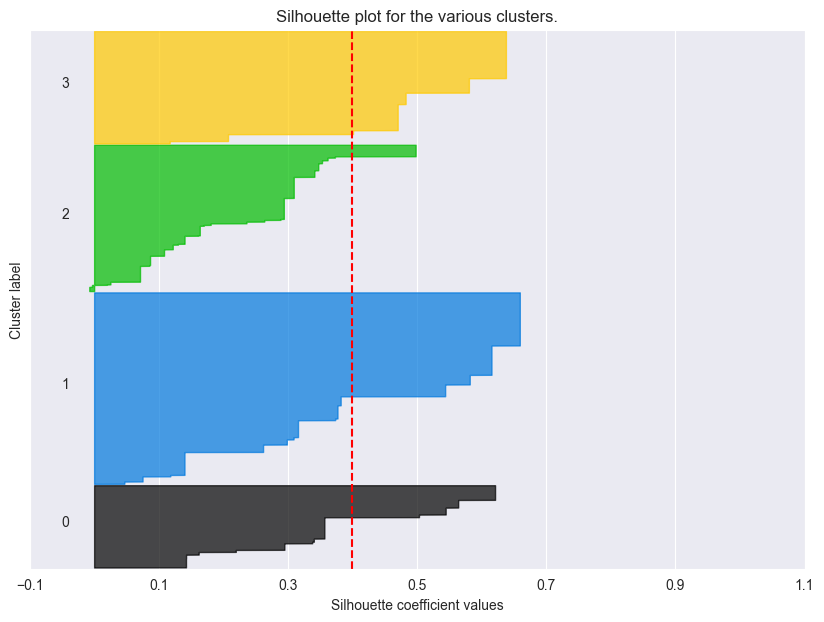

In [9]:
# Relevant columns for clustering
features = ['RSCORE', 'M SCORE', 'F SCORE']

# Apply log transformation to the features
df_log = df.copy()
for feature in features:
    df_log[f'log_{feature}'] = np.log1p(df[feature])

# Use the log-transformed columns for clustering
log_features = [f'log_{feature}' for feature in features]
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(df_log[log_features].values)

# Calculate silhouette scores
silhouette_avg = silhouette_score(df_log[log_features], labels)
sample_silhouette_values = silhouette_samples(df_log[log_features], labels)

print(f"Silhouette Score: {silhouette_avg}")

# Plot silhouette scores
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

# The silhouette coefficient can range from -1, 1 but in practice will be more compact
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(df_log) + (kmeans.n_clusters + 1) * 10])

y_lower = 10
for i in range(kmeans.n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / kmeans.n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for the various clusters.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()